In [1]:
from fastai.vision.all import *

In [2]:
path = untar_data(URLs.PETS)

In [3]:
path.ls()

(#2) [Path('/root/.fastai/data/oxford-iiit-pet/images'),Path('/root/.fastai/data/oxford-iiit-pet/annotations')]

In [4]:
files = get_image_files(path/"images")
len(files)

7390

In [5]:
files[0],files[6]

(Path('/root/.fastai/data/oxford-iiit-pet/images/Abyssinian_216.jpg'),
 Path('/root/.fastai/data/oxford-iiit-pet/images/Sphynx_144.jpg'))

In [9]:
def label_func(f): return f[0].isupper()

In [10]:
dls = ImageDataLoaders.from_name_func(path, files, label_func, item_tfms=Resize(224))

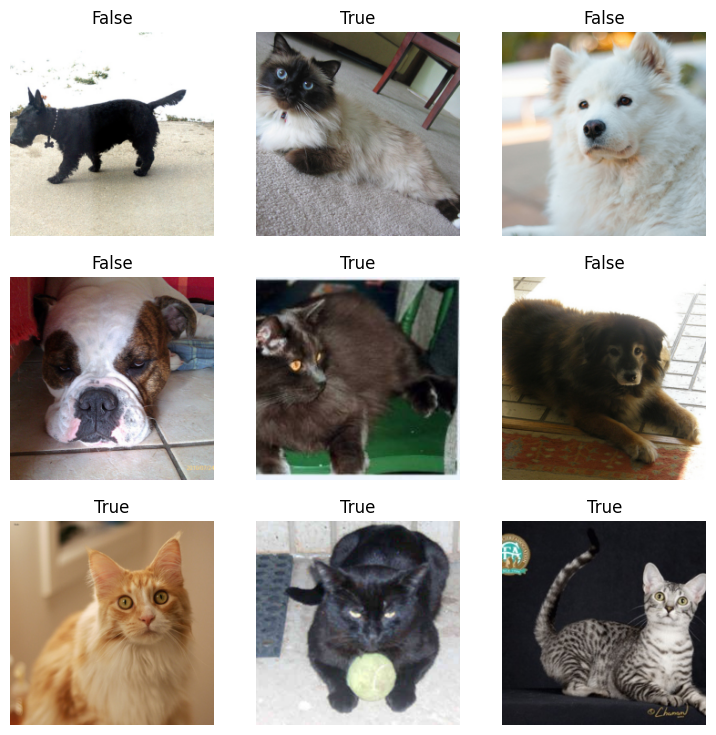

In [12]:
dls.show_batch()

In [13]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


100%|██████████| 83.3M/83.3M [00:01<00:00, 73.5MB/s]


In [14]:
learn.predict(files[0])

('True', tensor(1), tensor([8.1256e-20, 1.0000e+00]))

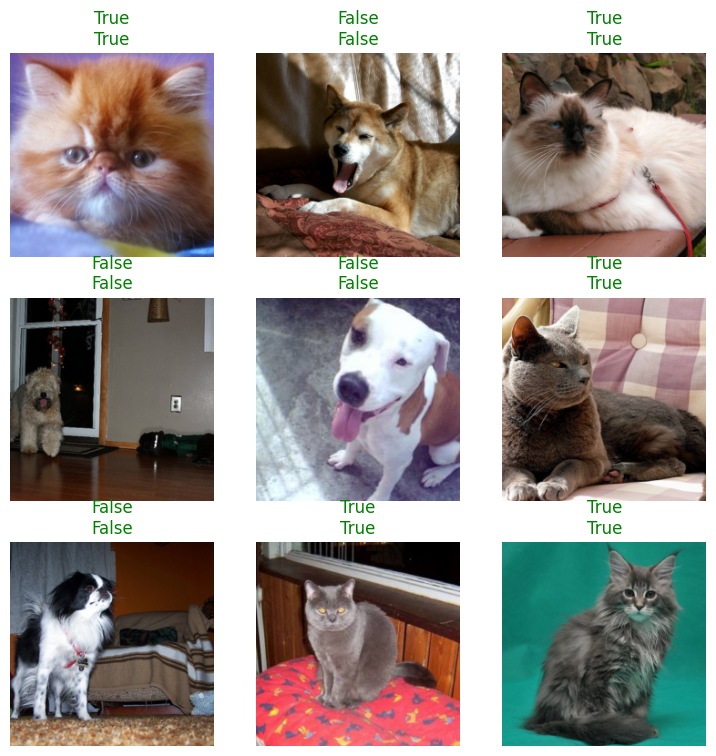

In [15]:
learn.show_results()

In [16]:
files[0].name

'Abyssinian_216.jpg'

In [17]:
pat = r'^(.*)_\d+.jpg'

In [18]:
dls = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(224))

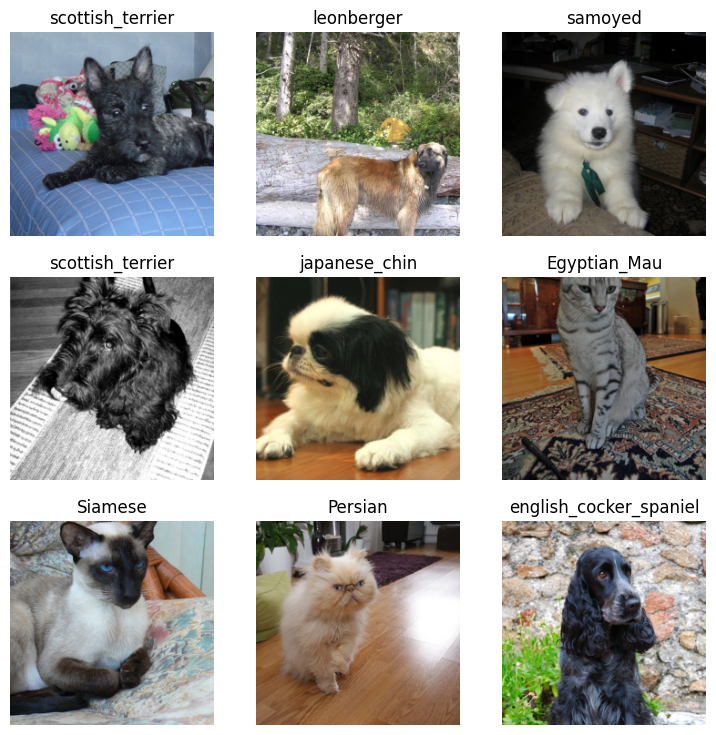

In [20]:
dls.show_batch()

In [21]:
learn = vision_learner(dls, resnet34, metrics=error_rate)

SuggestedLRs(valley=0.0012022644514217973)

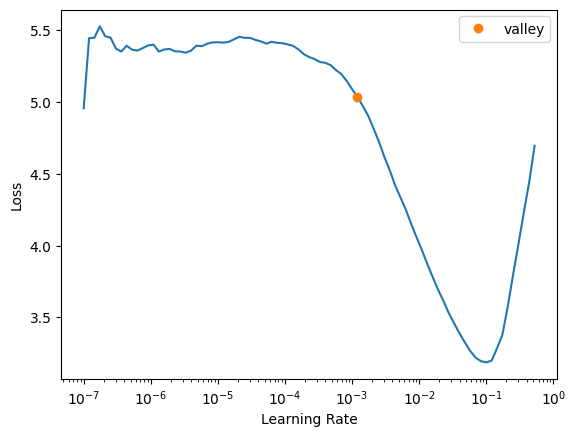

In [22]:
learn.lr_find()

In [23]:
learn.fine_tune(2, 3e-3)

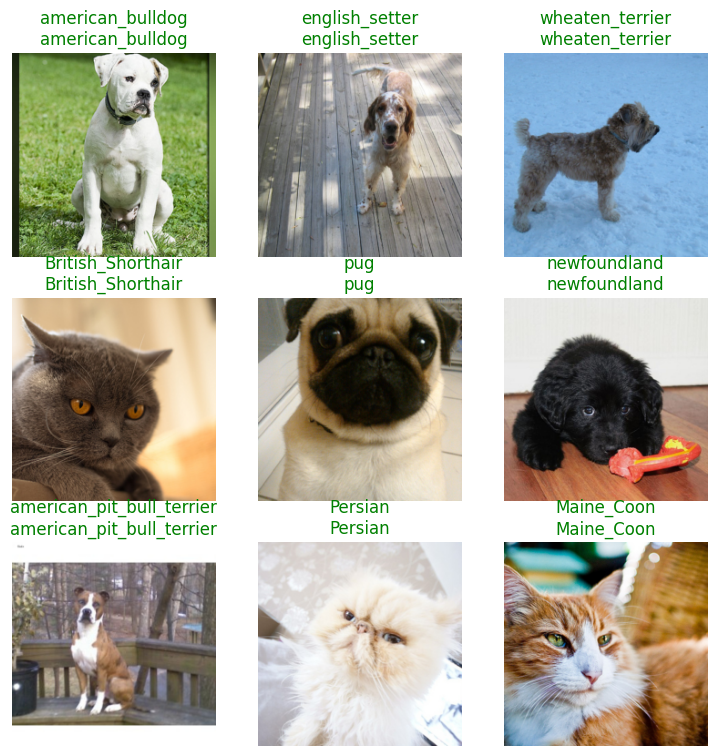

In [24]:
learn.show_results()

In [25]:
interp = Interpretation.from_learner(learn)

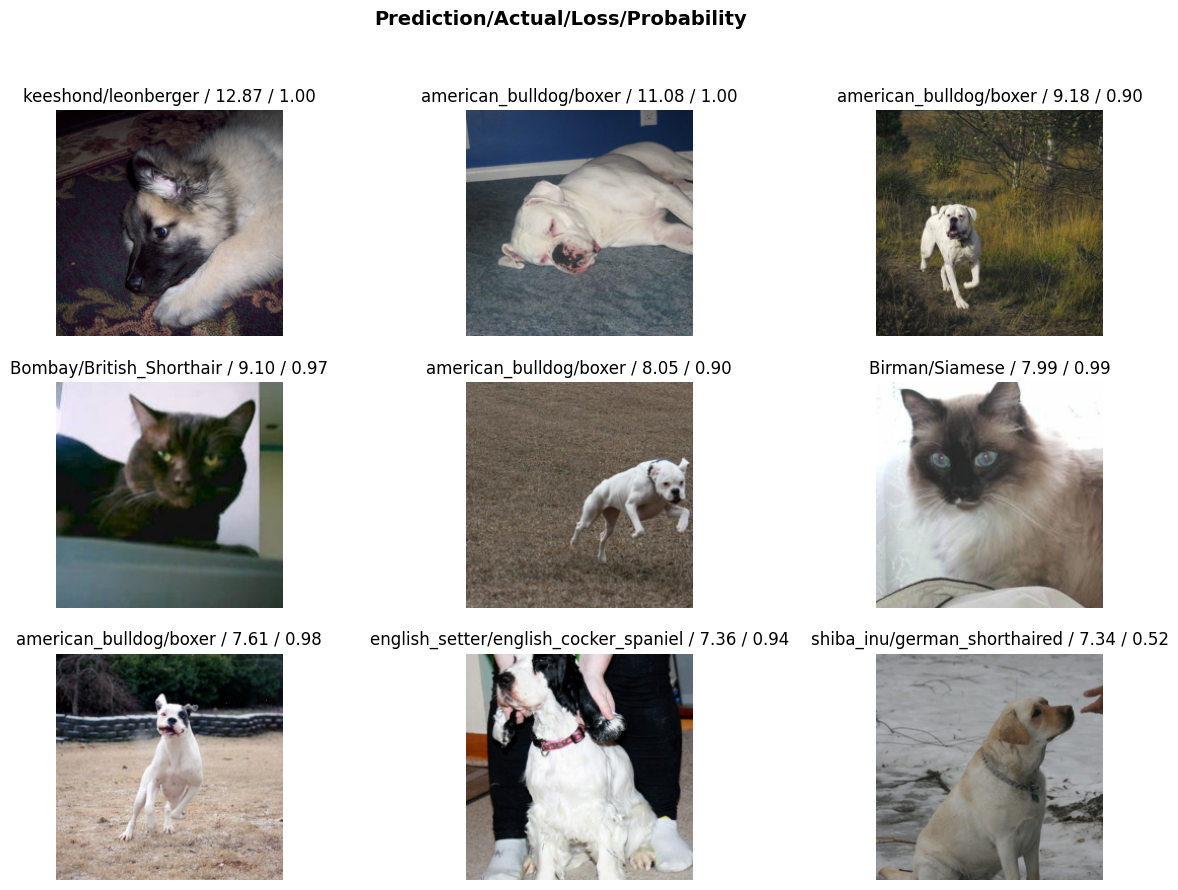

In [26]:
interp.plot_top_losses(9, figsize=(15,10))

#**With the data block API**

In [27]:
pets = DataBlock(blocks=(ImageBlock, CategoryBlock),
                 get_items=get_image_files,
                 splitter=RandomSplitter(),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=224))

In [28]:
dls = pets.dataloaders(untar_data(URLs.PETS)/"images")

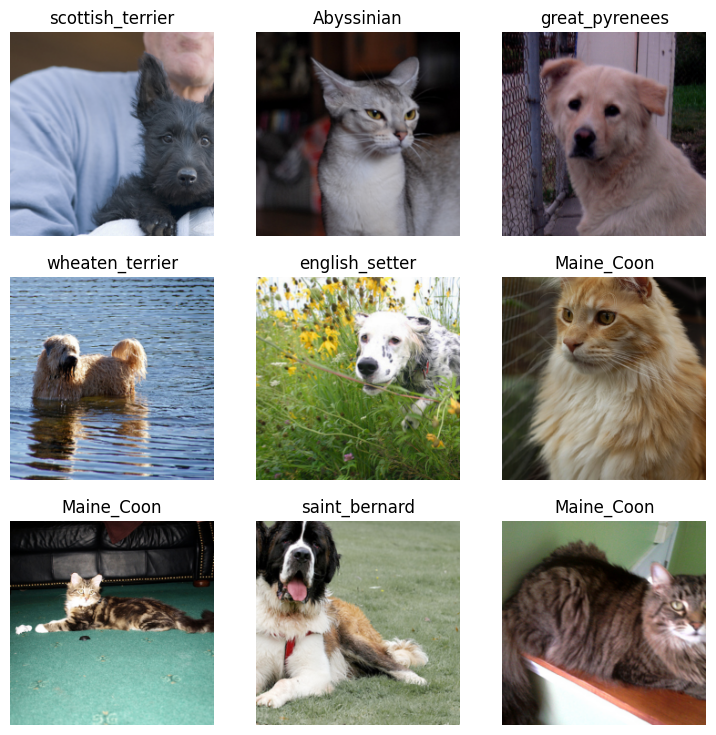

In [29]:
dls.show_batch(max_n=9)

In [31]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

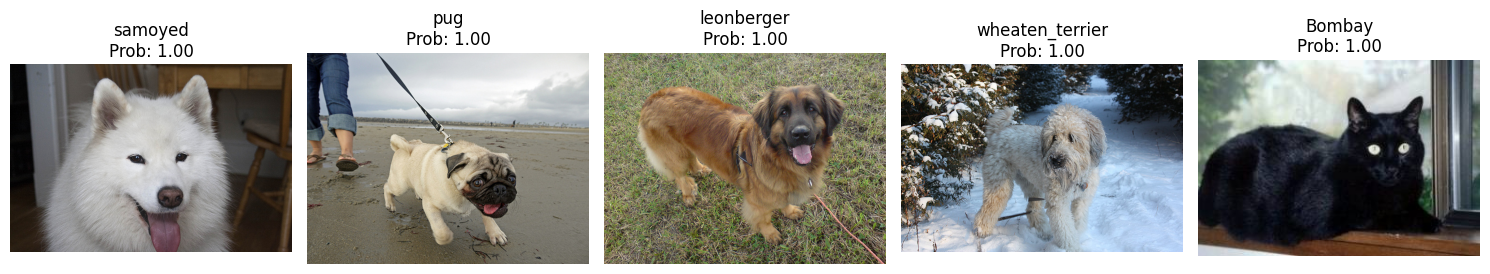

In [35]:
import matplotlib.pyplot as plt
from random import choice

samples = [choice(files) for _ in range(5)]

plt.figure(figsize=(15,5))

for i, img_path in enumerate(samples):
    img = PILImage.create(img_path)
    pred_class, pred_idx, outputs = learn.predict(img)

    prob = outputs[pred_idx].item()

    ax = plt.subplot(1, 5, i+1)
    ax.imshow(img)
    ax.axis('off')

    ax.set_title(f"{pred_class}\nProb: {prob:.2f}", fontsize=12)

plt.tight_layout()
plt.show()